<h2><font color="#004D7F" size=6>Estadística Descriptiva</font></h2>
<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>@IngAndresGamer </font><br>


---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

El objetivo de hoy es revisar como calcular los descriptivos basicos con Python. 

Para poder calcularos vamos a necesitar datos, ¿Donde podemos encontrar datos para aprender y probar diferentes algoritmos? , existen varios repositorios orientados a analitica y machine learning, uno es 
https://archive.ics.uci.edu/ml/index.php

In [11]:
## Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [34]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))
# Elimina el Scrolling Por Defecto
from IPython.display import display, HTML
js = "<script>$('.output_scroll').removeClass('output_scroll')</script>"
display(HTML(js))

<a id="section11"></a>
## <font color="#004D7F">1.1. Cargar el conjunto de datos</font>

In [13]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url,sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<a id="section2"></a>
# <font color="#004D7F"> 2. Funciones de estadística descriptiva</font>

La inspección de nuestro conjunto de datos es fundamental para poder entender mejor que técnica utilizar; además, nos ayudará a desarrollar nuestra intuición y hacernos preguntas sobre ellos. Las múltiples perspectivas de sus datos lo desafiarán a pensar en los datos de manera diferente.

<a id="section21"></a>
## <font color="#004D7F">2.1. Revisar los datos: _head()_ </font>

Puede revisar las primeras 20 filas de sus datos utilizando la función `head()` en el DataFrame de Pandas. Puede ver que la primera columna enumera el número de fila, lo cual es útil para hacer referencia a una observación específica.

In [15]:
data.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  \
0             7.4             0.700         0.00             1.9      0.076                 11.0   
1             7.8             0.880         0.00             2.6      0.098                 25.0   
2             7.8             0.760         0.04             2.3      0.092                 15.0   
3            11.2             0.280         0.56             1.9      0.075                 17.0   
4             7.4             0.700         0.00             1.9      0.076                 11.0   
5             7.4             0.660         0.00             1.8      0.075                 13.0   
6             7.9             0.600         0.06             1.6      0.069                 15.0   
7             7.3             0.650         0.00             1.2      0.065                 15.0   
8             7.8             0.580         0.02             2.0      0.073                  9.0   
9             7.5             0.500         0.36             6.1      0.071                 17.0   
10            6.7             0.580         0.08             1.8      0.097                 15.0   
11            7.5             0.500         0.36             6.1      0.071                 17.0   
12            5.6             0.615         0.00             1.6      0.089                 16.0   
13            7.8             0.610         0.29             1.6      0.114                  9.0   
14            8.9             0.620         0.18             3.8      0.176                 52.0   
15            8.9             0.620         0.19             3.9      0.170                 51.0   
16            8.5             0.280         0.56             1.8      0.092                 35.0   
17            8.1             0.560         0.28             1.7      0.368                 16.0   
18            7.4             0.590         0.08             4.4      0.086                  6.0   
19            7.9             0.320         0.51             1.8      0.341                 17.0   

    total sulfur dioxide  density    pH  sulphates  alcohol  quality  
0                   34.0    0.998  3.51       0.56      9.4        5  
1                   67.0    0.997  3.20       0.68      9.8        5  
2                   54.0    0.997  3.26       0.65      9.8        5  
3                   60.0    0.998  3.16       0.58      9.8        6  
4                   34.0    0.998  3.51       0.56      9.4        5  
5                   40.0    0.998  3.51       0.56      9.4        5  
6                   59.0    0.996  3.30       0.46      9.4        5  
7                   21.0    0.995  3.39       0.47     10.0        7  
8                   18.0    0.997  3.36       0.57      9.5        7  
9                  102.0    0.998  3.35       0.80     10.5        5  
10                  65.0    0.996  3.28       0.54      9.2        5  
11                 102.0    0.998  3.35       0.80     10.5        5  
12                  59.0    0.994  3.58       0.52      9.9        5  
13                  29.0    0.997  3.26       1.56      9.1        5  
14                 145.0    0.999  3.16       0.88      9.2        5  
15                 148.0    0.999  3.17       0.93      9.2        5  
16                 103.0    0.997  3.30       0.75     10.5        7  
17                  56.0    0.997  3.11       1.28      9.3        5  
18                  29.0    0.997  3.38       0.50      9.0        4  
19                  56.0    0.997  3.04       1.08      9.2        6

<a id="section22"></a>
## <font color="#004D7F">2.2. Dimensiones de los datos: _shape_ </font>

Puede revisar la forma y el tamaño de su conjunto de datos imprimiendo la propiedad `shape` en el DataFrame de Pandas. Los resultados se enumeran en filas y luego en columnas. Puede ver que el conjunto de datos tiene 768 filas y 9 columnas

In [16]:
# Dimensions of your data
data.shape

(1599, 12)

<a id="section23"></a>
## <font color="#004D7F">2.3. Tipo de datos: _dtypes_ </font>

Puede enumerar los tipos de datos utilizados por el DataFrame para caracterizar cada atributo utilizando la propiedad `dtypes`. Puede ver que la mayoría de los atributos son enteros y que `mass` y `pedi` son tipos de coma flotante.

In [17]:
# Data Types for Each Attribute
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [18]:
data['quality']=data['quality'].astype('category')

<a id="section24"></a>
## <font color="#004D7F">2.4. Resumen: _describe()_ </font>

Puedes ver que obtienes muchos datos. Notará algunas llamadas como `pandas.set_option()` utilizada para cambiar la precisión de los números y el ancho preferido de la salida. Esto es para que sea más legible para este ejemplo. Al describir sus datos de esta manera, vale la pena tomarse un tiempo y revisar las observaciones de los resultados.

In [19]:
# Statistical Summary
pd.set_option('display.width',100)
pd.set_option('display.precision', 3) ## Se tuvo que cambiar el atributo a cambiar en display.precision
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
count       1599.000          1599.000     1599.000        1599.000   1599.000   
mean           8.320             0.528        0.271           2.539      0.087   
std            1.741             0.179        0.195           1.410      0.047   
min            4.600             0.120        0.000           0.900      0.012   
25%            7.100             0.390        0.090           1.900      0.070   
50%            7.900             0.520        0.260           2.200      0.079   
75%            9.200             0.640        0.420           2.600      0.090   
max           15.900             1.580        1.000          15.500      0.611   

       free sulfur dioxide  total sulfur dioxide   density        pH  sulphates   alcohol  
count             1599.000              1599.000  1599.000  1599.000   1599.000  1599.000  
mean                15.875                46.468     0.997     3.311      0.658    10.423  
std                 10.460                32.895     0.002     0.154      0.170     1.066  
min                  1.000                 6.000     0.990     2.740      0.330     8.400  
25%                  7.000                22.000     0.996     3.210      0.550     9.500  
50%                 14.000                38.000     0.997     3.310      0.620    10.200  
75%                 21.000                62.000     0.998     3.400      0.730    11.100  
max                 72.000               289.000     1.004     4.010      2.000    14.900

<a id="section25"></a>
## <font color="#004D7F">2.5. Distribución entre clases: _groupby('class').size()_ </font>

De esta manera se puede encontrar la distribucion de las clases 

In [21]:
# Class Distribution
data.groupby('quality').size() ## Nos Permite veririficar la distribución de datos categoricos. 

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

<AxesSubplot:xlabel='quality'>

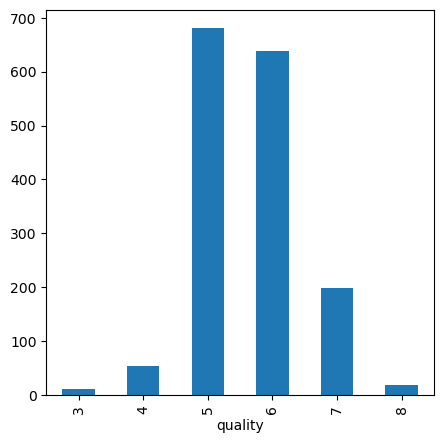

In [22]:
plt.figure(figsize=(5,5))
data.groupby('quality').size().plot(kind='bar')

<a id="section26"></a>
## <font color="#004D7F">2.6. Correlaciones: _corr()_ </font>

Puede usar la función `corr()` para calcular una matriz de correlación. La matriz enumera todos los atributos en la parte superior y lateral, para dar correlación entre todos los pares de atributos (dos veces, porque la matriz es simétrica). Puede ver que la línea diagonal a través de la matriz desde las esquinas superior izquierda a inferior derecha de la matriz muestra una correlación perfecta de cada atributo consigo mismo.

                      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
fixed acidity                 1.000            -0.256        0.672           0.115      0.094   
volatile acidity             -0.256             1.000       -0.552           0.002      0.061   
citric acid                   0.672            -0.552        1.000           0.144      0.204   
residual sugar                0.115             0.002        0.144           1.000      0.056   
chlorides                     0.094             0.061        0.204           0.056      1.000   
free sulfur dioxide          -0.154            -0.011       -0.061           0.187      0.006   
total sulfur dioxide         -0.113             0.076        0.036           0.203      0.047   
density                       0.668             0.022        0.365           0.355      0.201   
pH                           -0.683             0.235       -0.542          -0.086     -0.265   
sulphates                     

<function matplotlib.pyplot.show(close=None, block=None)>

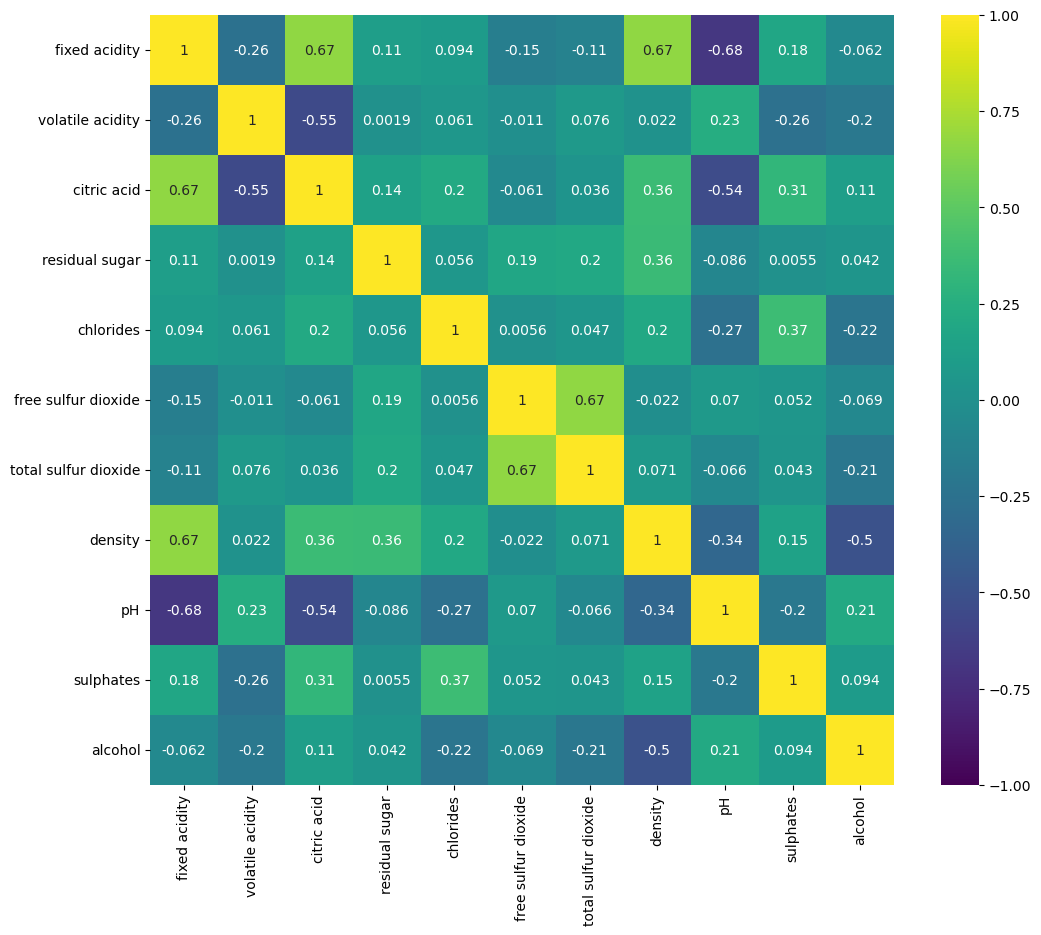

In [23]:
# Pairwise Pearson correlations
plt.figure(figsize=(12,10))
correlation=data.corr(method='pearson')
print(correlation)
sns.heatmap(correlation, vmin=-1,vmax=1,annot=True, cmap='viridis')
plt.show

In [27]:
coor_matrix=correlation.abs()
upper=coor_matrix.where(np.triu(np.ones(coor_matrix.shape),k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.65
to_drop = [column for column in upper.columns if any(upper[column]>0.65)]
print(f'Columnas con correlación alta:{to_drop}')

Columnas con correlación alta:['citric acid', 'total sulfur dioxide', 'density', 'pH']


<a id="section27"></a>
## <font color="#004D7F">2.7. Asimetría: _skew()_ </font>

Puede calcular el sesgo de cada atributo utilizando la función `skew()`. El resultado de inclinación muestra una inclinación positiva (derecha) o negativa (izquierda). Los valores más cercanos a cero muestran menos sesgo.

In [28]:
# Skew for each attribute
data.skew(numeric_only=True)

fixed acidity           0.983
volatile acidity        0.672
citric acid             0.318
residual sugar          4.541
chlorides               5.680
free sulfur dioxide     1.251
total sulfur dioxide    1.516
density                 0.071
pH                      0.194
sulphates               2.429
alcohol                 0.861
dtype: float64

<a id="section28"></a>
## <font color="#004D7F">2.8. Histogramas </font>

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

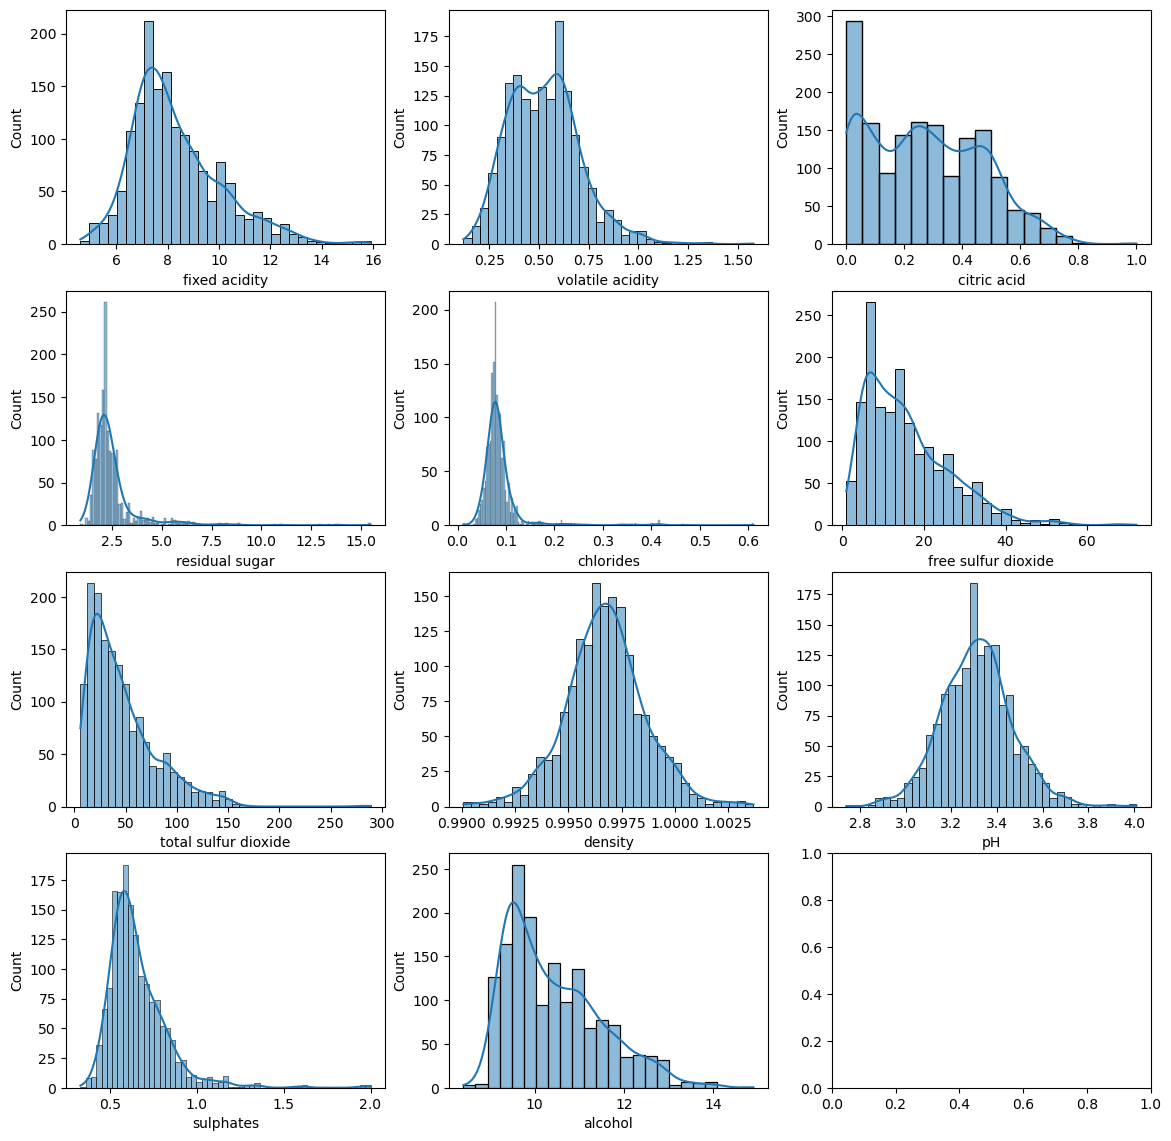

In [29]:
f , axes = plt.subplots(4,3,figsize=(14,14))
sns.histplot(data['fixed acidity'],kde=True,ax=axes[0,0])
sns.histplot(data['volatile acidity'],kde=True,ax=axes[0,1])
sns.histplot(data['citric acid'],kde=True,ax=axes[0,2])
sns.histplot(data['residual sugar'],kde=True,ax=axes[1,0])
sns.histplot(data['chlorides'],kde=True,ax=axes[1,1])
sns.histplot(data['free sulfur dioxide'],kde=True,ax=axes[1,2])
sns.histplot(data['total sulfur dioxide'],kde=True,ax=axes[2,0])
sns.histplot(data['density'],kde=True,ax=axes[2,1])
sns.histplot(data['pH'],kde=True,ax=axes[2,2])
sns.histplot(data['sulphates'],kde=True,ax=axes[3,0])
sns.histplot(data['alcohol'],kde=True,ax=axes[3,1])

## <font color="#004D7F">2.9.  Matriz de dispersion por clase </font>

<Figure size 3000x3000 with 0 Axes>

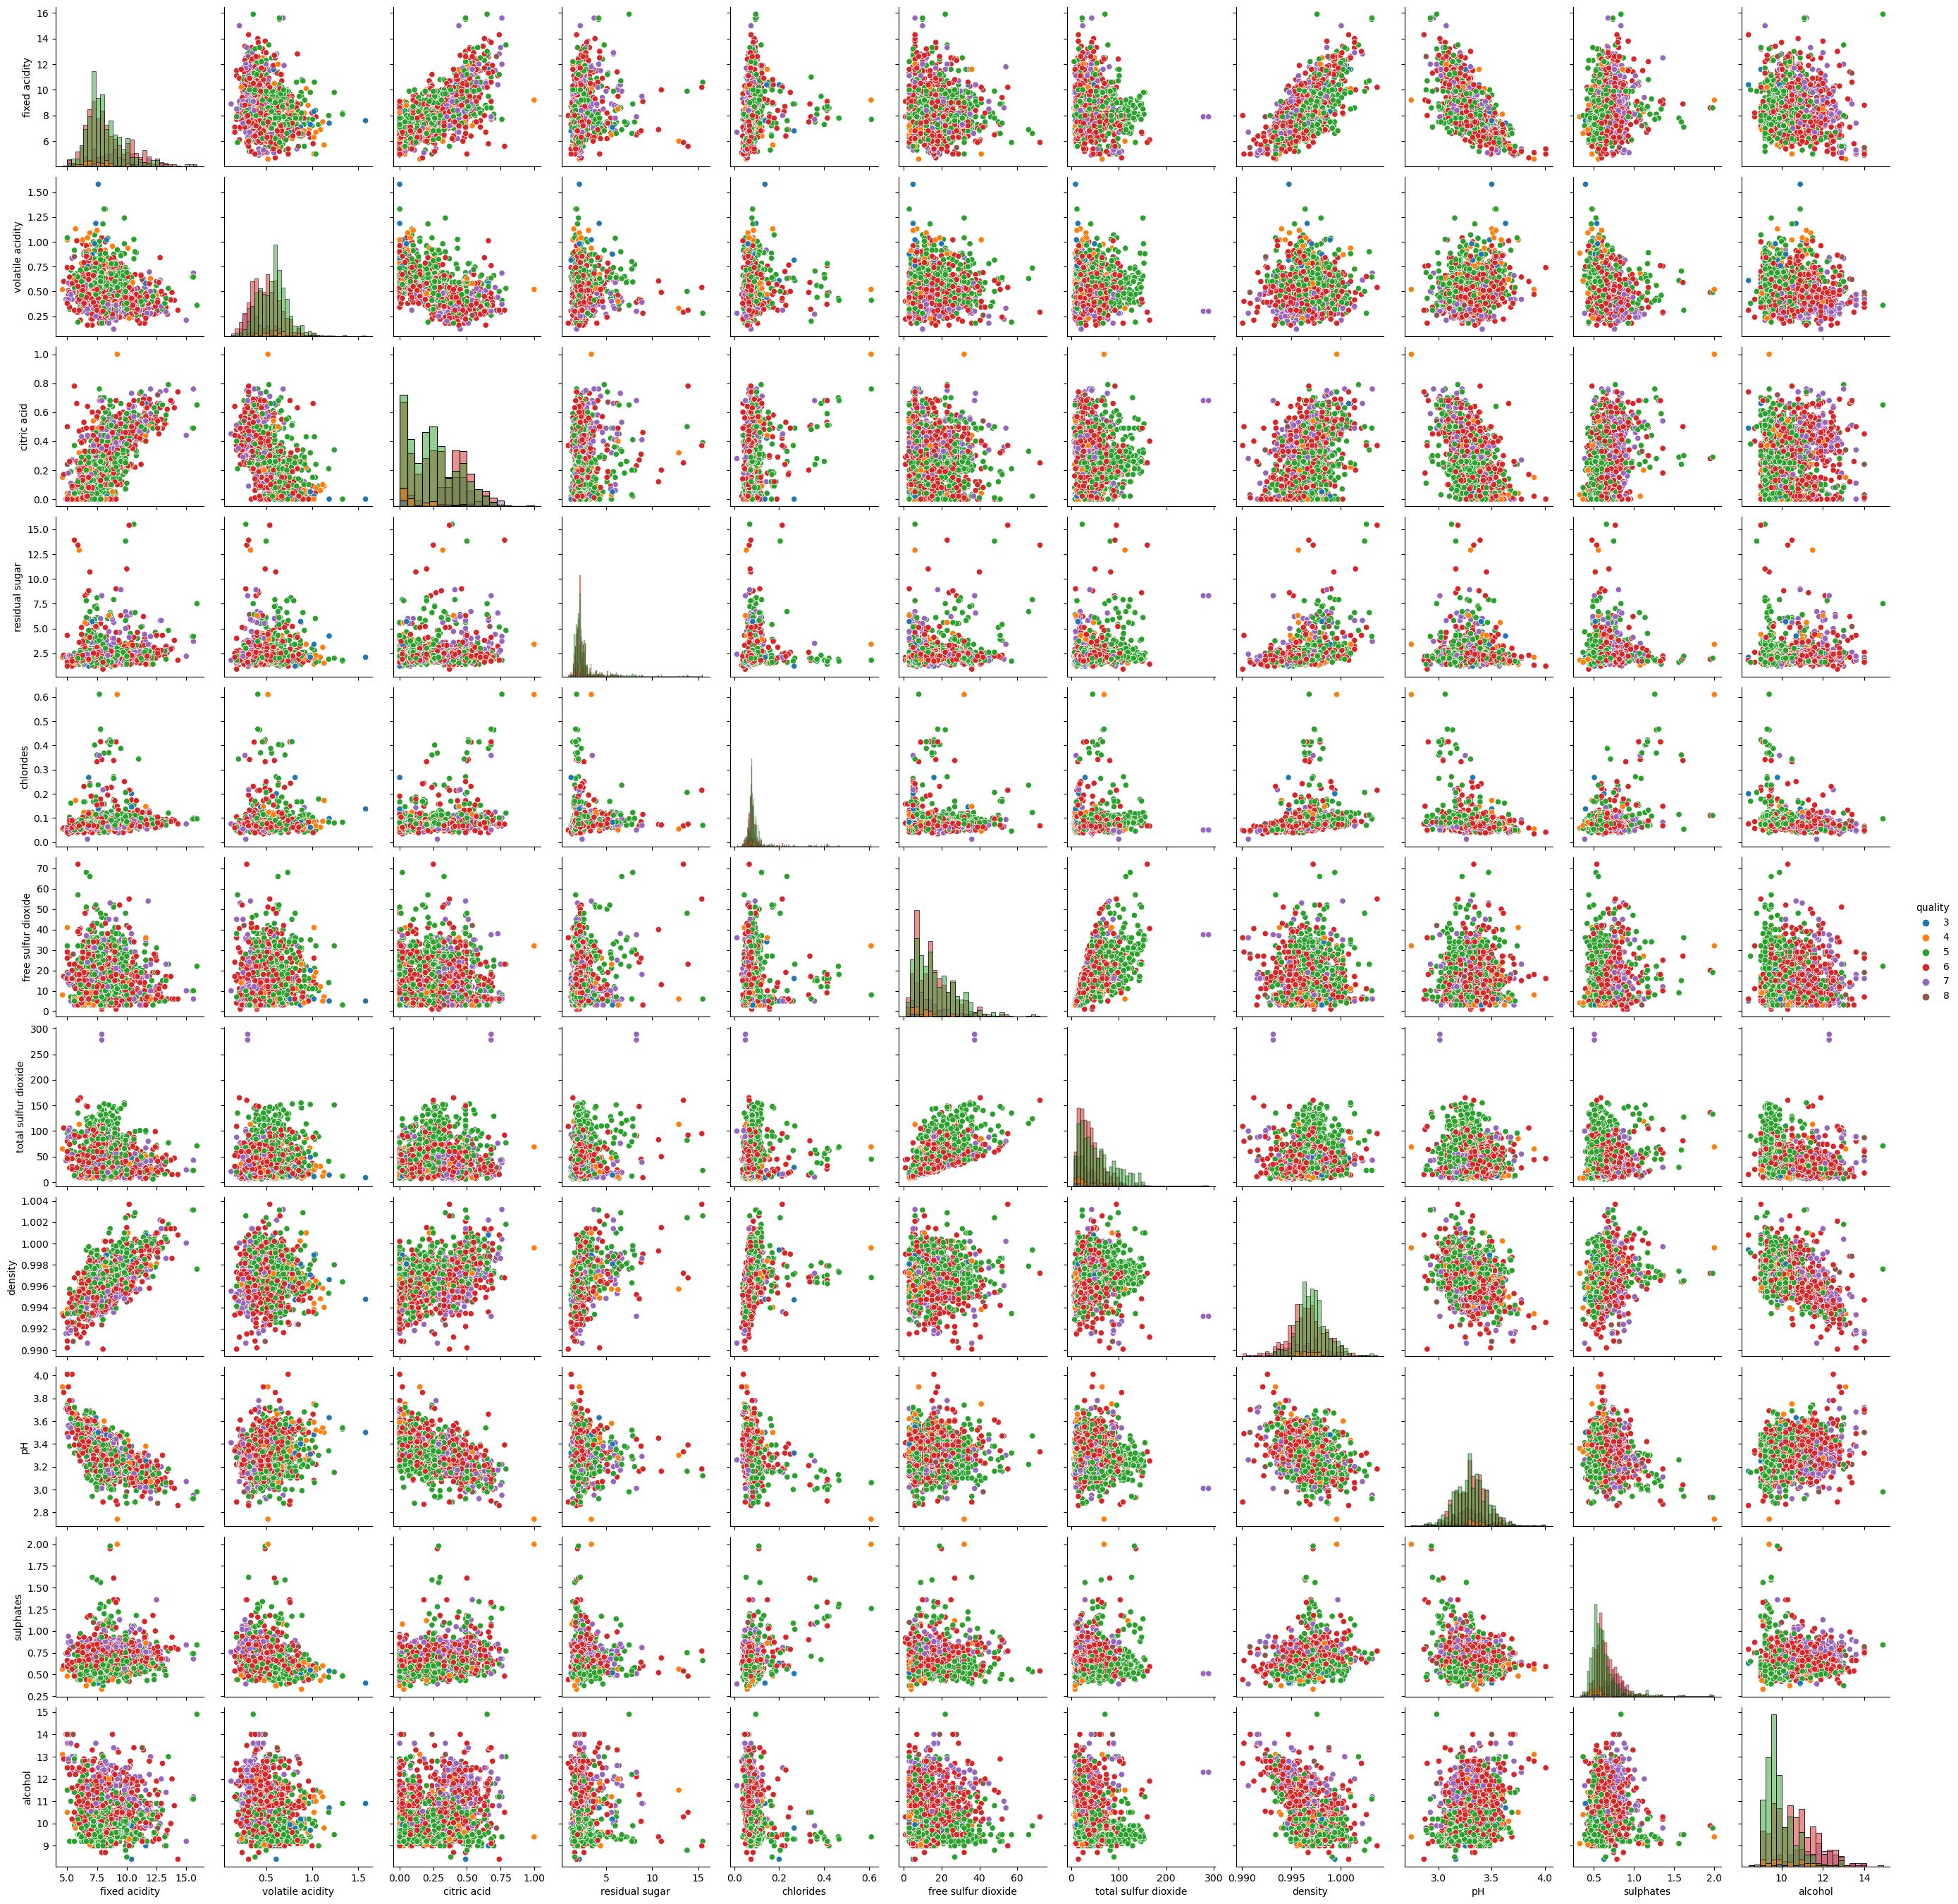

In [31]:
plt.figure(figsize=(30,30))
# Correlatioin matrix Seaborn
sns.pairplot(data,hue="quality",diag_kind="hist")
plt.show()

 ## <font color="#004D7F">2.10. BoxPlots </font>

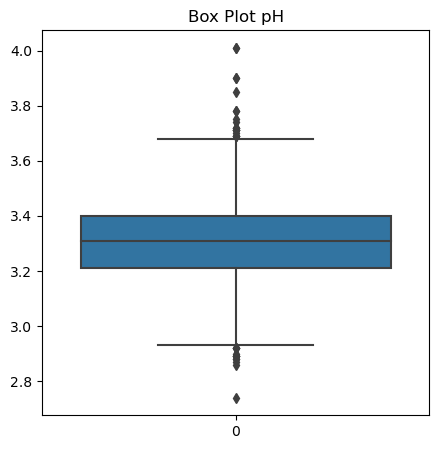

In [36]:
plt.figure(figsize=(5,5))
plt.title('Box Plot pH')
sns.boxplot(data["pH"])
plt.show()


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>